name: Marco Giunta

# Exercise 1: Scotland Lakes

In [155]:
library("tidyverse")

## 1.0) Loading the data
First of all we load the data. Since I'm too lazy to manually input it and still pretty new to R I wrote a little python script to generate everything for us; by executing it the working folder will be populated with one csv file for each column of the dataframe.

In [1]:
#this executes a system command which one may type manually in the terminal
system("python laghi_Scozia_helper_script.py")

[1] 0

In [2]:
#we can now actually read the data
scottish.lakes.volume <- read.csv("Volume.csv")
scottish.lakes.area <- read.csv("Area.csv")
scottish.lakes.length <- read.csv("Length.csv")
scottish.lakes.maxdepth <- read.csv("Max-depth.csv")
scottish.lakes.meandepth <- read.csv("Mean-depth.csv")

#we print one as an example
print(str(scottish.lakes.volume))
scottish.lakes.volume

'data.frame':	13 obs. of  2 variables:
 $ Loch  : chr  "Ness" "Lomond" "Morar" "Tay" ...
 $ Volume: num  7.45 2.6 2.3 1.6 1.2 1.09 1.08 1.07 0.97 0.79 ...
NULL


Loch,Volume
<chr>,<dbl>
Ness,7.45
Lomond,2.60
Morar,2.30
Tay,1.60
Awe,1.20
Maree,1.09
Ericht,1.08
Lochy,1.07
Rannoch,0.97


In [3]:
#Thanks to str(...) we notice that the objects we just created are actually dataframes even though we want named vectors; 
#to fix this we create new vectors out of the above dataframes and set their names using the setNames function, where we
#once again exploit the dataframes to create the chr vector containing the names to be given to each num value

lake_names <- scottish.lakes.volume[[1]]#notice the [[]] operator, needed to extract a chr vector instead of a dataframe

volume <- setNames(scottish.lakes.volume[[2]],lake_names) #same here: [[]] is needed to obtain a num vector
area <- setNames(scottish.lakes.area[[2]],lake_names)
length <- setNames(scottish.lakes.length[[2]],lake_names)
maxdepth <- setNames(scottish.lakes.maxdepth[[2]],lake_names)
meandepth <- setNames(scottish.lakes.meandepth[[2]],lake_names)

#we print one as an example
print(str(volume))
volume

 Named num [1:13] 7.45 2.6 2.3 1.6 1.2 1.09 1.08 1.07 0.97 0.79 ...
 - attr(*, "names")= chr [1:13] "Ness" "Lomond" "Morar" "Tay" ...
NULL


Ness  Lomond   Morar     Tay     Awe   Maree  Ericht   Lochy Rannoch   Shiel 
   7.45    2.60    2.30    1.60    1.20    1.09    1.08    1.07    0.97    0.79 
Katrine  Arkaig    Shin 
   0.77    0.75    0.35

In [4]:
#We can now create the final dataframe starting from the named vectors. Notice that data.frame(...) automatically uses
#the names inside each vector to create the dataframe index instead of a separate "Loch" column
scottish.lakes <- data.frame(volume,area,length,maxdepth,meandepth)
column_names <- c("Volume (km^3)","Area (km^2)","Length (km)","Max depth (m)","Mean depth (m)")
scottish.lakes <- setNames(scottish.lakes,column_names)
scottish.lakes

,Volume (km^3),Area (km^2),Length (km),Max depth (m),Mean depth (m)
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Ness,7.45,56.0,39.0,230,132.0
Lomond,2.60,71.0,36.0,190,37.0
Morar,2.30,27.0,18.8,310,87.0
Tay,1.60,26.4,23.0,150,60.6
Awe,1.20,39.0,41.0,94,32.0
Maree,1.09,28.6,20.0,114,38.0
Ericht,1.08,18.6,23.0,156,57.6
Lochy,1.07,16.0,16.0,162,70.0
Rannoch,0.97,19.0,15.7,134,51.0


In [22]:
#As we already noted the above doesn't contain a "Loch" column, encoding that information in the index column
#(more precisely: in the row names). It's easy to modify our dataframe in such a way as to put the Loch col. in line with the
#others via the row.names function; since I like having "Loch" as the row names column I'm just going to create another dataframe.

#print(row.names(scottish.lakes))
scottish.lakes_loch_col <- scottish.lakes
scottish.lakes_loch_col$Loch <- row.names(scottish.lakes)
row.names(scottish.lakes_loch_col) <- NULL
scottish.lakes_loch_col <- scottish.lakes_loch_col[c("Loch",names(scottish.lakes))] #this moves the "Loch" col. to the left
scottish.lakes_loch_col

Loch,Volume (km^3),Area (km^2),Length (km),Max depth (m),Mean depth (m)
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Ness,7.45,56.0,39.0,230,132.0
Lomond,2.60,71.0,36.0,190,37.0
Morar,2.30,27.0,18.8,310,87.0
Tay,1.60,26.4,23.0,150,60.6
Awe,1.20,39.0,41.0,94,32.0
Maree,1.09,28.6,20.0,114,38.0
Ericht,1.08,18.6,23.0,156,57.6
Lochy,1.07,16.0,16.0,162,70.0
Rannoch,0.97,19.0,15.7,134,51.0


## Data analysis

### 1.1) min/max volume lake
Functions `min` and `max` may be trivially used to find the maximum and minimum volume values by feeding them `scottish.lakes["Volume (km^3)"]` as argument. To find which lake these value correspond to we can either use `which.min`/`which.max` (which is the mathematical operation of $\text{argmin}$/$\text{argmax}$) to find the index of the minimum/maximum value or use logical indexing (other solutions may exist, of course; this are only two of the simplest).

In [43]:
#min
min.vol.value = min(scottish.lakes$`Volume (km^3)`)
min.vol.loch = row.names(scottish.lakes)[which.min(scottish.lakes$`Volume (km^3)`)]
#min.vol.loch = scottish.lakes_loch_col[scottish.lakes["Volume (km^3)"] == min.vol.value][1] #this is equivalent but longer to 
#write and a bit harder to read

message = c("The minimum lake volume is",min.vol.value,"km^3 and is achieved by Loch",min.vol.loch)
print(paste(message, collapse=" ", sep=" ")) #collapse is needed to achieve a single string instead of a chr vector

#max
max.vol.value = max(scottish.lakes$`Volume (km^3)`)
max.vol.loch = row.names(scottish.lakes)[which.max(scottish.lakes$`Volume (km^3)`)]
#max.vol.loch = scottish.lakes_loch_col[scottish.lakes["Volume (km^3)"] == max.vol.value][1] #this is equivalent but longer to 
#write and a bit harder to read

message = c("The maximum lake volume is",max.vol.value,"km^3 and is achieved by Loch",max.vol.loch)
print(paste(message, collapse=" ", sep=" "))

[1] "The minimum lake volume is 0.35 km^3 and is achieved by Loch Shin"
[1] "The maximum lake volume is 7.45 km^3 and is achieved by Loch Ness"


### 1.2) Arranging rows by area value
We can use the `arrange` function from library `dplyr` to achieve the desired result.

In [56]:
#I'm changing the column names to a slightly less human-readable format to make typing/using functions easier.
names(scottish.lakes) <- c("volume","area","length","maxdepth","meandepth")
scottish.lakes_sorted_by_area <- arrange(scottish.lakes, desc(area)) #desc is needed to have descending order.
#Technically it's not necessary to sort by descending area, but it's easier to subset with [1] and [2] than 
#it is with [length(..)] or something similar

message <- c("The two lakes with the largest areas are",row.names(scottish.lakes_sorted_by_area)[1],
             "and",row.names(scottish.lakes_sorted_by_area)[2],"with area values",
             scottish.lakes_sorted_by_area$area[1],"and",scottish.lakes_sorted_by_area$area[2],"km^2 respectively")

print(paste(message, sep=" ", collapse=" "))

[1] "The two lakes with the largest areas are Lomond and Ness with area values 71 and 56 km^2 respectively"


### 1.3) Summing area values
To find the total area of Scotland covered by water we straightforwardly apply the sum function.

In [60]:
message <- c("The total area of Scotland covered by water is",sum(scottish.lakes$area),"km^2.")
print(paste(message, sep=" ", collapse=" "))

[1] "The total area of Scotland covered by water is 372 km^2."


# Exercise 2: oil prices

## 2.1) Loading the data
First we create a dataframe by downloading it directly from the web (I slightly modified the provided URL to make this possible)

In [62]:
url <- "https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3&export=download"
oil <- read.csv(url, skip=1) #the first row in the original document is just a comment and therefore we ignore it
oil

Entity,Code,Year,OilPrice
<chr>,<chr>,<int>,<dbl>
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74
World,OWID_WRL,1867,2.41
World,OWID_WRL,1868,3.63
World,OWID_WRL,1869,3.64


## Data analysis

### 2.2) Plot of oil price vs year

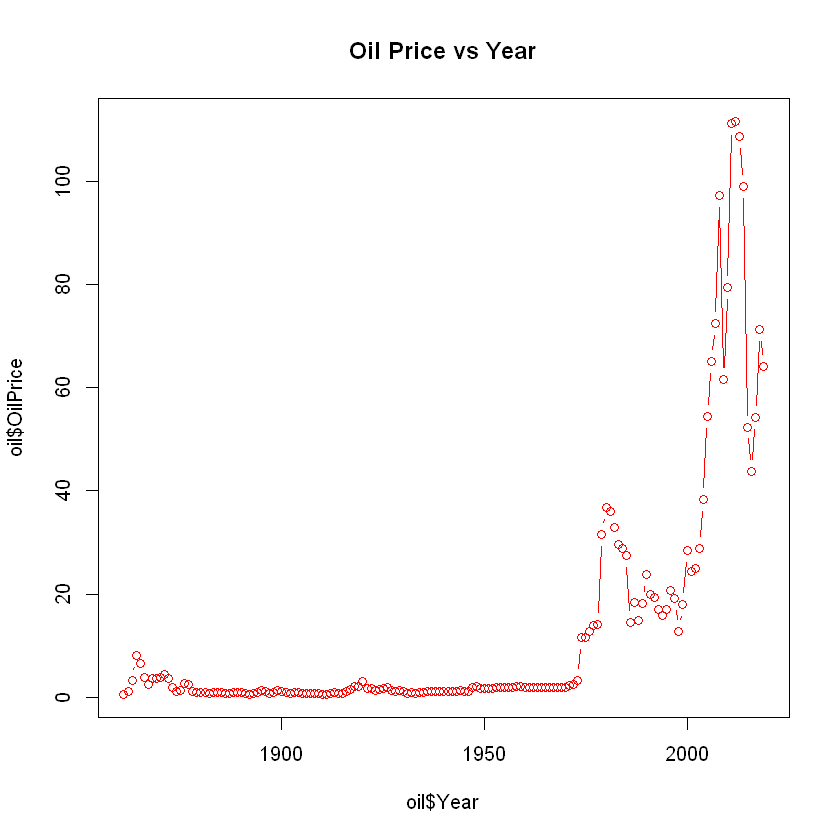

In [71]:
plot(oil$Year,oil$OilPrice,type="b",col="red")
title("Oil Price vs Year")

### 2.3) Maximum price ever reached
We employ the strategy used in the Loch exercise; namely, we use a combination of the `max` and `which.max` functions to find our answer.

In [74]:
message <- c("The highest price was reached in",oil$Year[which.max(oil$OilPrice)],
             "and it amounted to",max(oil$OilPrice),"dollars")
print(paste(message, sep=" ", collapse=" "))

[1] "The highest price was reached in 2012 and it amounted to 111.669702380952 dollars"


### 2.4) Forward derivative computation & plot
The `diff` function is all we need! The only detail to be addressed with care is that `diff` yields a vector which is one element shorter than `oil$Year`; a simple solution is to padd our new vector with a 0 at the beginning (we choose this value at this position because it approximately makes sense if we inspect the previous plot, but this is an arbitrary decision nonetheless).

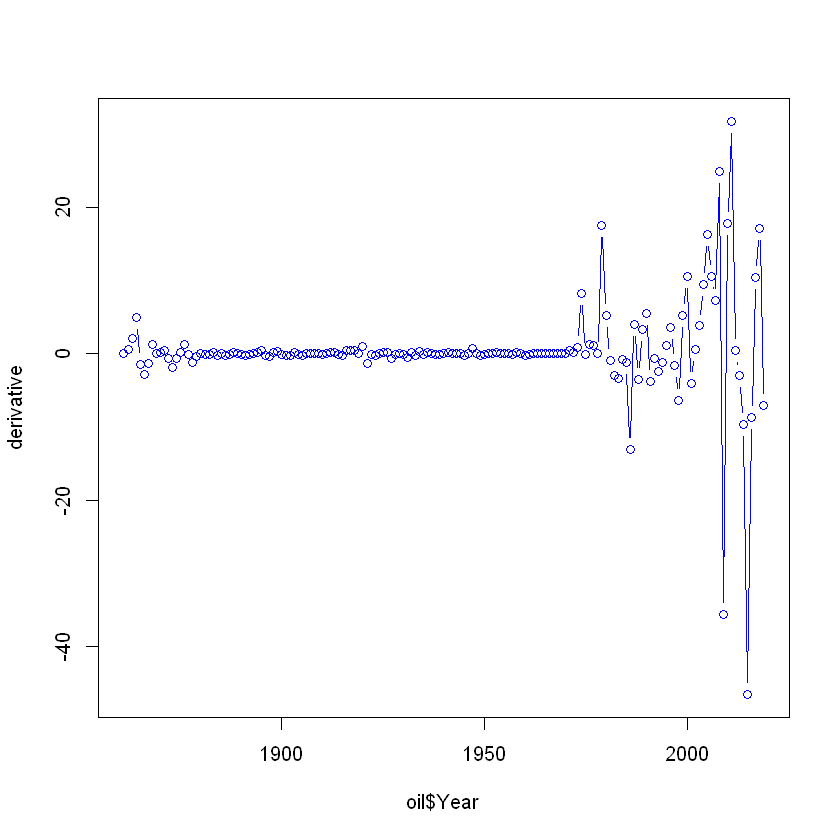

In [80]:
derivative <- c(0,diff(oil$OilPrice))
plot(oil$Year,derivative,type="b",col="blue")

# Exercise 3: World coal production

## 3.1) Loading the data
This time we want to create a tibble object instead of a dataframe; to import the data, therefore, we have at least to possible ways to proceed:
- we import the data using `read.csv` in a dataframe as above and then convert to a tibble using `tibble`;
- we skip the dataframe as an intermidiate step and immediately create a tibble using `read_csv`.

Either is fine.

In [157]:
url <- "https://drive.google.com/u/0/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download" #once again: slightly modified
#coal <- tibble(read.csv(url)) #alternative 1
coal <- read_csv(url) #alternative 2. Notice that is somewhat smarter, in that with no further arguments if we import with
#read_csv the last column's name is automatically formatted in the correct way (whitespaces are left as in the original csv,
#whereas read.csv replaces them with .).
coal


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


In [158]:
#we modify the first & last columns' names to make typing easier
names(coal)[c(1,4)] <- c("Country","TWh")
coal

Country,Code,Year,TWh
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


## Data analysis

### 3.2.1) Number & occurrences of available countries
The `unique` function applied to the Country column trivially lets us find unique countries and therefore their number via the `length` function.    
Computing the number of entries associated to each country is slightly more involved, and of the many possible solutions to be found online I'm using the one which I find to be the shortest: we use the `table` function to create a table object - which contains the couples (country,number of occurrences) - which we cast to array; then we recover the country names we just threw away by re-assigning them thanks to the unique dataframe.

In [159]:
countries <- unique(coal$Country)
n.countries <- length(countries) #I find it useful here to be a little redundant with variables 
message <- c("The number of unique contries whose data is available is",n.countries)
print(paste(message,sep=" ",collapse=" "))
#countries

[1] "The number of unique contries whose data is available is 200"


In [160]:
#this table tells us how many time each country appears in the Country column of the coal tibble
n.occurrences <- table(coal$Country)
n.occurrences


                     Afghanistan                           Africa 
                             117                              104 
                         Albania                          Algeria 
                             117                               65 
                  American Samoa              Antigua and Barbuda 
                              37                               37 
                       Argentina                          Armenia 
                              65                               25 
                           Aruba                 Asia and Oceania 
                              31                              117 
                    Asia Pacific                        Australia 
                              39                              104 
                         Austria                          Bahamas 
                              65                               37 
                        Barbados                          Bel

In [161]:
#we now reassign this variable 
n.occurrences <- as.numeric(n.occurrences) #it now is a numeric array containing the numeric part only
#since we lost the names we name every element in our new array by exploiting the fact that unique() earlier gave us exactly
#what we need now (both table and unique sorted by alphabetical order)
names(n.occurrences) <- countries
n.occurrences

#the result should be the same one can obtain in python by using:
#import pandas as pd
#pd.read_csv(url).groupby("Entity").nunique().Year

Afghanistan                           Africa 
                             117                              104 
                         Albania                          Algeria 
                             117                               65 
                  American Samoa              Antigua and Barbuda 
                              37                               37 
                       Argentina                          Armenia 
                              65                               25 
                           Aruba                     Asia Pacific 
                              31                              117 
                Asia and Oceania                        Australia 
                              39                              104 
                         Austria                          Bahamas 
                              65                               37 
                        Barbados                          Belgium 
                              37                               65 
                          Belize                            Benin 
                              37                               37 
                         Bermuda                           Bhutan 
                              37                               37 
          Bosnia and Herzegovina                         Botswana 
                              25                              117 
                          Brazil           British Virgin Islands 
                             104                               37 
                        Bulgaria                     Burkina Faso 
                             104                               37 
                           Burma                          Burundi 
                             117                              117 
                             CIS                         Cambodia 
                              37                               37 
                        Cameroon                           Canada 
                             104                               37 
                      Cape Verde                   Cayman Islands 
                              37                               37 
        Central African Republic        Central and South America 
                             117                               65 
                           Chile                            China 
                             104                               39 
                        Colombia                          Comoros 
                             104                               37 
                    Cook Islands                       Costa Rica 
                              37                               15 
                            Cuba                          Czechia 
                              15                               39 
                  Czechoslovakia     Democratic Republic of Congo 
                              93                               95 
                         Denmark                         Djibouti 
                              65                               37 
                        Dominica               Dominican Republic 
                              37                               37 
                           EU-28                      El Salvador 
                              18                               11 
               Equatorial Guinea                          Eritrea 
                              23                              117 
                        Eswatini                         Ethiopia 
                              18                              117 
                         Eurasia                           Europe 
                             117                              104 
                  Europe (other)                   Faeroe Islands 
                              39                               37 
 

### 3.2.2) Barplot

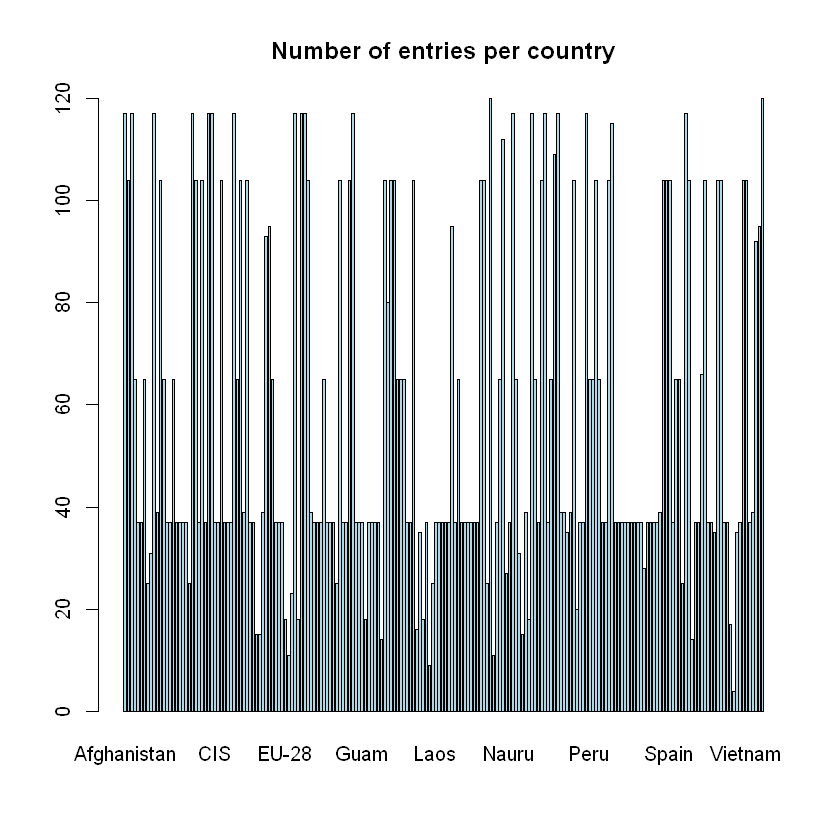

In [162]:
barplot(n.occurrences, col="lightblue") #this isn't really a human readable plot...
title("Number of entries per country")

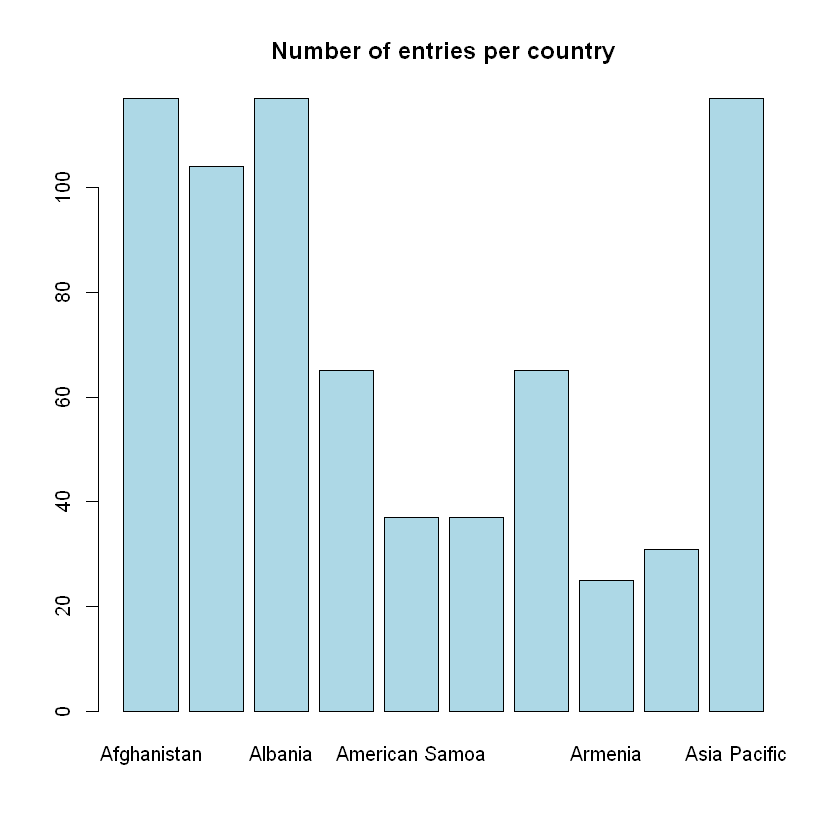

In [163]:
barplot(n.occurrences[1:10], col="lightblue")#with less countries it is much more readable
title("Number of entries per country")

### 3.3) Total production
We first select the years $\geq 1970$ with the help of logical indexing and save the result in a separate tibble (redundant but helpful step); after this we can explain how to compute the integrated production associated to each country.

In [174]:
indices <- coal$Year > 1969 #the boolean vector to be used to subset tibbles
coal.1970 <- coal[indices,] #watch out for that comma: without it R assumes we want to index the columns, which of course
#doesn't work

Country,Code,Year,TWh
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1970,1.335
Afghanistan,AFG,1971,1.099
Afghanistan,AFG,1972,0.578
Afghanistan,AFG,1973,0.952
Afghanistan,AFG,1974,0.936
Afghanistan,AFG,1975,1.221
Afghanistan,AFG,1976,1.303
Afghanistan,AFG,1977,1.384
Afghanistan,AFG,1978,1.775


In [169]:
coal$Year[coal$Year>1969]

[1] 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
  [15] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
  [29] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
  [43] 2012 2013 2014 2015 2016 1981 1982 1983 1984 1985 1986 1987 1988 1989
  [57] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
  [71] 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
  [85] 2018 2019 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
  [99] 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 [113] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 [127] 2010 2011 2012 2013 2014 2015 2016 1980 1981 1982 1983 1984 1985 1986
 [141] 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 [155] 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 [169] 2015 2016 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 [183] 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 [197] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1992 1993 1994
 [211] 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 [225] 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988 1989 1990 1991
 [239] 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 [253] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1981 1982 1983
 [267] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 [281] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 [295] 2012 2013 2014 2015 2016 2017 2018 2019 1970 1971 1972 1973 1974 1975
 [309] 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 [323] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 [337] 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1981
 [351] 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 [365] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 [379] 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 1980 1981 1982 1983
 [393] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 [407] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 [421] 2012 2013 2014 2015 2016 1980 1981 1982 1983 1984 1985 1986 1987 1988
 [435] 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 [449] 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 [463] 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 [477] 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 [491] 2008 2009 2010 2011 2012 2013 2014 2015 2016 1980 1981 1982 1983 1984
 [505] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 [519] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 [533] 2013 2014 2015 2016 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 [547] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 [561] 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1980
 [575] 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 [589] 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 [603] 2009 2010 2011 2012 2013 2014 2015 2016 1992 1993 1994 1995 1996 1997
 [617] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 [631] 2012 2013 2014 2015 2016 1970 1971 1972 1973 1974 1975 1976 1977 1978
 [645] 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 [659] 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 [673] 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1981 1982 1983 1984
 [687] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 [701] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 [715] 2013 2014 2015 2016 2017 2018 2019 1980 1981 1982 1983 1984 1985 1986